In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.patches import Rectangle
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MultipleLocator

In [4]:
working_dir = "./"
rna_004_1 = "../Exemplar_Data/identity_statistics/07_27_23_RNA004_GM12878_polyA_RNA_sup_8mods_polyA.GRCh38.sorted.calmd.filtered.chr2_112157000_114000000_read_stats.txt"
rna_004_091 = "../Exemplar_Data/identity_statistics/07_27_23_RNA004_GM12878_polyA_RNA.dorado_0.8.1_sup.moves.psi.GRCh38.calmd.filtered.chr2_112157000_114000000_read_stats.txt"
rna_002_2021 = "../Exemplar_Data/identity_statistics/nbt_data_6.3.2_hac.pass.NoU.hg38.sorted.calmd.filtered.chr2_112157000_114000000_read_stats.txt"
rna_002_2019 = "../Exemplar_Data/identity_statistics/NA12878-DirectRNA.pass.dedup.NoU.fastq.hg38.minimap2.sorted.calmd.filtered.chr2_112157000_114000000_read_stats.txt"

rna004_df = pd.read_csv(rna_004_091, sep='\t')
rna004_df["Align_Length"] = rna004_df["Align_Length"] - rna004_df["intron_skip"]
rna004_df = rna004_df[rna004_df["Align_Length"] >=200]

rna002_df = pd.read_csv(rna_002_2021, sep = "\t")
rna002_df["Align_Length"] = rna002_df["Align_Length"] - rna002_df["intron_skip"]
rna002_df = rna002_df[rna002_df["Align_Length"] >=200]

RNA002 median indel proportion: 0.08062484764768019
RNA004 median indel proportion: 0.011834319526627219


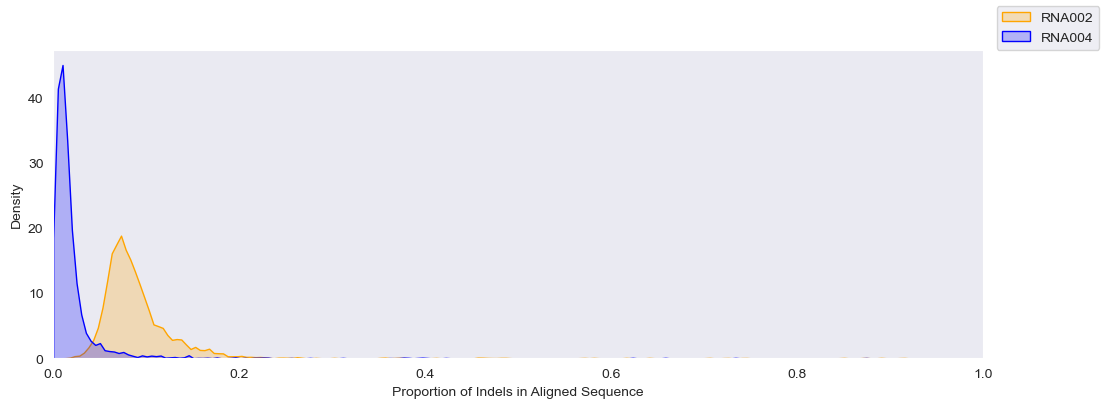

In [7]:
rna002_indel_proportion = [(x+y)/z for x,y,z in zip(rna002_df["insertions"].to_list(), 
                                          rna002_df["deletions"].to_list(), 
                                          rna002_df["Align_Length"].to_list())]

rna004_indel_proportion = [(x+y)/z for x,y,z in zip(rna004_083_df["insertions"].to_list(), 
                                          rna004_083_df["deletions"].to_list(), 
                                          rna004_083_df["Align_Length"].to_list())]

print(f"RNA002 median indel proportion: {np.median(rna002_indel_proportion)}\nRNA004 median indel proportion: {np.median(rna004_indel_proportion)}")
sns.set_style('dark')
fig, ax = plt.subplots(1)
fig.set_figwidth(12)
fig.set_figheight(4)
sns.kdeplot(x = rna002_indel_proportion, 
            fill = True, 
            color='orange', 
            ax = ax, 
            label = 'RNA002', 
            clip=[0, 1.0], 
            bw_adjust=0.2)

sns.kdeplot(x = rna004_indel_proportion, 
            fill = True, 
            color = 'blue', 
            ax = ax, 
            label = 'RNA004', 
            clip=[0, 1.0], 
            bw_adjust=0.2)

ax.set_xlim([0.0, 1.0])
ax.set_xlabel("Proportion of Indels in Aligned Sequence")
fig.legend()
fig.get_figure().savefig(os.path.join(working_dir,"RNA002_vs_RNA004_Indel_Proportion.pdf"))